# Polars Introduction

This tutorial is an introduction to the **polars** package, which is a fast and elegant `DataFrame` libary that shares many of the same objectives as **pandas**. It uses Apache Arrow's columnar format as its memory model.

## Importing Packages

In [ ]:
import polars as pl
import numpy as np
import pandas as pd
from datetime import datetime

## Reading-In Data

One of the great things about **polars** is that you can easily read-in mupliple files using the `*` character.  In the code below we read-in many large CSV files easily with a single line of code.

In [ ]:
%%time
df_delta_neutral = pl.read_csv("data/L3_2018_01/L3_options_*.csv")

CPU times: user 26.2 s, sys: 4.86 s, total: 31.1 s
Wall time: 5.06 s


To do something similar in **pandas** we could do something as follows. This code fails on my computer because of RAM limitations, which highlights a major benefit of **polars** over **pandas** - the ability to handle larger data sets.

The `DataFrame` that we are working with is quite large.

In [ ]:
df_delta_neutral.estimated_size("gb")

3.0375496363267303

## Exploring `df_delta_neutral`

We can print out the contents of a `DataFrame` in a manner similar to **pandas**.  Notice a few differences:

- the shape of the `DataFrame` is printed at the top
- the date types of each column are printed
- the contents of `str` columns are presented in double quotes
- there is no index - most **pandas** users (including myself) just use `.reset_index()` all the time anyway

In [ ]:
df_delta_neutral

UnderlyingSymbol,UnderlyingPrice,Flags,OptionSymbol,Type,Expiration,DataDate,Strike,Last,Bid,Ask,Volume,OpenInterest,T1OpenInterest,IVMean,IVBid,IVAsk,Delta,Gamma,Theta,Vega,AKA
str,f64,str,str,str,str,str,f64,f64,f64,f64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,str
"""A""",67.6,"""*""","""A180119C00020000""","""call""","""01/19/2018""","""01/02/2018""",20.0,0.0,45.6,49.85,0,0,0,0.1777,0.0,5.0316,1.0,0.0,-0.3217,0.0,"""A180119C00020000"""
"""A""",67.6,"""*""","""A180119P00020000""","""put""","""01/19/2018""","""01/02/2018""",20.0,0.18,0.0,0.03,0,11,11,0.2776,0.0,2.2641,0.0,0.0,0.0,0.0,"""A180119P00020000"""
"""A""",67.6,"""*""","""A180119C00022500""","""call""","""01/19/2018""","""01/02/2018""",22.5,45.0,42.9,47.35,0,0,0,0.1777,0.0,4.5811,1.0,0.0,-0.3619,0.0,"""A180119C00022500"""
"""A""",67.6,"""*""","""A180119P00022500""","""put""","""01/19/2018""","""01/02/2018""",22.5,1.84,0.0,0.03,0,15,15,0.2776,0.0,2.0541,0.0,0.0,0.0,0.0,"""A180119P00022500"""
"""A""",67.6,"""*""","""A180119C00025000""","""call""","""01/19/2018""","""01/02/2018""",25.0,0.0,40.3,44.7,0,0,0,0.1777,0.0,4.0955,1.0,0.0,-0.4022,0.0,"""A180119C00025000"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""ZYNE""",12.09,"""*""","""ZYNE200117P00020000""","""put""","""01/17/2020""","""01/31/2018""",20.0,10.9,8.8,11.0,0,9,9,0.6282,0.459,0.7974,-0.5396,0.0366,-0.8941,6.5936,"""ZYNE200117P00020000"""
"""ZYNE""",12.09,"""*""","""ZYNE200117C00022500""","""call""","""01/17/2020""","""01/31/2018""",22.5,0.0,0.4,4.7,0,0,0,0.701,0.3516,1.0504,0.44,0.0328,-1.1717,6.5846,"""ZYNE200117C00022500"""
"""ZYNE""",12.09,"""*""","""ZYNE200117P00022500""","""put""","""01/17/2020""","""01/31/2018""",22.5,0.0,10.5,13.4,0,0,0,0.607,0.3683,0.8456,-0.6059,0.0366,-0.7926,6.3602,"""ZYNE200117P00022500"""


We can use the `.glimpse()` method to inspect larger `DataFrames`.

In [ ]:
df_delta_neutral.glimpse()

Rows: 17675339
Columns: 22
$ UnderlyingSymbol <str> 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A'
$ UnderlyingPrice  <f64> 67.6, 67.6, 67.6, 67.6, 67.6, 67.6, 67.6, 67.6, 67.6, 67.6
$ Flags            <str> '*', '*', '*', '*', '*', '*', '*', '*', '*', '*'
$ OptionSymbol     <str> 'A180119C00020000', 'A180119P00020000', 'A180119C00022500', 'A180119P00022500', 'A180119C00025000', 'A180119P00025000', 'A180119C00027500', 'A180119P00027500', 'A180119C00030000', 'A180119P00030000'
$ Type             <str> 'call', 'put', 'call', 'put', 'call', 'put', 'call', 'put', 'call', 'put'
$ Expiration       <str> '01/19/2018', '01/19/2018', '01/19/2018', '01/19/2018', '01/19/2018', '01/19/2018', '01/19/2018', '01/19/2018', '01/19/2018', '01/19/2018'
$  DataDate        <str> '01/02/2018', '01/02/2018', '01/02/2018', '01/02/2018', '01/02/2018', '01/02/2018', '01/02/2018', '01/02/2018', '01/02/2018', '01/02/2018'
$ Strike           <f64> 20.0, 20.0, 22.5, 22.5, 25.0, 25.0, 27.5, 27.5, 30.0, 30.0
$ Last

We can isolate a specific column of a `DataFrame` with the `.get_column()` method.

In [ ]:
df_delta_neutral.get_column("OptionSymbol")

OptionSymbol
str
"""A180119C00020000"""
"""A180119P00020000"""
"""A180119C00022500"""
"""A180119P00022500"""
"""A180119C00025000"""
…
"""ZYNE200117P00020000"""
"""ZYNE200117C00022500"""
"""ZYNE200117P00022500"""


The column of a `DataFrame` is a `Series` object.

In [ ]:
type(df_delta_neutral.get_column("OptionSymbol"))

polars.series.series.Series

## Dropping Columns

To make our `DataFrame` smaller for the purposes of printing to the screen, lets drop some columns using the `DataFrame.drop()` method.  In **polars** you cannot modify a `DataFrame` in place, so you have to reassign to the same variable.

In [ ]:
cols_to_drop = [
    "Flags", "OptionSymbol", "OpenInterest", "T1OpenInterest",
    "IVBid", "IVAsk", "Delta", "Gamma", "Theta", "Vega", "AKA",
]
df_delta_neutral = df_delta_neutral.drop(cols_to_drop)
df_delta_neutral

UnderlyingSymbol,UnderlyingPrice,Type,Expiration,DataDate,Strike,Last,Bid,Ask,Volume,IVMean
str,f64,str,str,str,f64,f64,f64,f64,i64,f64
"""A""",67.6,"""call""","""01/19/2018""","""01/02/2018""",20.0,0.0,45.6,49.85,0,0.1777
"""A""",67.6,"""put""","""01/19/2018""","""01/02/2018""",20.0,0.18,0.0,0.03,0,0.2776
"""A""",67.6,"""call""","""01/19/2018""","""01/02/2018""",22.5,45.0,42.9,47.35,0,0.1777
"""A""",67.6,"""put""","""01/19/2018""","""01/02/2018""",22.5,1.84,0.0,0.03,0,0.2776
"""A""",67.6,"""call""","""01/19/2018""","""01/02/2018""",25.0,0.0,40.3,44.7,0,0.1777
…,…,…,…,…,…,…,…,…,…,…
"""ZYNE""",12.09,"""put""","""01/17/2020""","""01/31/2018""",20.0,10.9,8.8,11.0,0,0.6282
"""ZYNE""",12.09,"""call""","""01/17/2020""","""01/31/2018""",22.5,0.0,0.4,4.7,0,0.701
"""ZYNE""",12.09,"""put""","""01/17/2020""","""01/31/2018""",22.5,0.0,10.5,13.4,0,0.607


## Renaming Columns

To rename columns we supply a `Dict` to the `DataFrame.rename()` method.  In **polars** you cannot modify a `DataFrame` in place, so you have to reassign to the same variable.

In [ ]:
df_delta_neutral = df_delta_neutral.rename({" DataDate":"DataDate"})
df_delta_neutral

UnderlyingSymbol,UnderlyingPrice,Type,Expiration,DataDate,Strike,Last,Bid,Ask,Volume,IVMean
str,f64,str,str,str,f64,f64,f64,f64,i64,f64
"""A""",67.6,"""call""","""01/19/2018""","""01/02/2018""",20.0,0.0,45.6,49.85,0,0.1777
"""A""",67.6,"""put""","""01/19/2018""","""01/02/2018""",20.0,0.18,0.0,0.03,0,0.2776
"""A""",67.6,"""call""","""01/19/2018""","""01/02/2018""",22.5,45.0,42.9,47.35,0,0.1777
"""A""",67.6,"""put""","""01/19/2018""","""01/02/2018""",22.5,1.84,0.0,0.03,0,0.2776
"""A""",67.6,"""call""","""01/19/2018""","""01/02/2018""",25.0,0.0,40.3,44.7,0,0.1777
…,…,…,…,…,…,…,…,…,…,…
"""ZYNE""",12.09,"""put""","""01/17/2020""","""01/31/2018""",20.0,10.9,8.8,11.0,0,0.6282
"""ZYNE""",12.09,"""call""","""01/17/2020""","""01/31/2018""",22.5,0.0,0.4,4.7,0,0.701
"""ZYNE""",12.09,"""put""","""01/17/2020""","""01/31/2018""",22.5,0.0,10.5,13.4,0,0.607


## Expressions and Contexts

In **polars**, an *expression* is a lazy representation of a data transformation. Expressions are modular and flexible, which means you can use them as building blocks to build more complex expressions. Here is an example of a **polars** expression that encapsulates the logic of calculating the mid-price from the `Bid` and `Ask` columns.

In [ ]:
pl.col("Bid") + pl.col("Ask") / 2

<Expr ['[(col("Bid")) + ([(col("Ask"))…']>

The code above expresses an abstract computation that we can save in a variable, manipulate further, or just print:

In [ ]:
mid_expr = pl.col("Bid") + pl.col("Ask") / 2
type(mid_expr)

polars.expr.expr.Expr

In [ ]:
mid_expr

<Expr ['[(col("Bid")) + ([(col("Ask"))…']>

In **polars**, expressions need a *context* in which they are executed to produce a result. Depending on the context it is used in, the same **polars** expression can produce different results. The four most common contexts are:

1. `select`
2. `with_columns`
3. `filter`
4. `group_by`

## `select`

The context `select` may produce new columns that are aggregations, combinations of other columns, or literals:

In [ ]:
df_delta_neutral.select(
    bid = pl.col("Bid"),
    ask = pl.col("Ask"),
    mid1 = mid_expr,
    mid2 = pl.col("Bid") + pl.col("Ask") / 2,
    avg_bid = pl.col("Bid").mean(),
    dummy = pl.lit(True),
)

bid,ask,mid1,mid2,avg_bid,dummy
f64,f64,f64,f64,f64,bool
45.6,49.85,70.525,70.525,19.447932,true
0.0,0.03,0.015,0.015,19.447932,true
42.9,47.35,66.575,66.575,19.447932,true
0.0,0.03,0.015,0.015,19.447932,true
40.3,44.7,62.65,62.65,19.447932,true
…,…,…,…,…,…
8.8,11.0,14.3,14.3,19.447932,true
0.4,4.7,2.75,2.75,19.447932,true
10.5,13.4,17.2,17.2,19.447932,true


The `.alias()` syntax can also be used to name columns.

In [ ]:
df_delta_neutral.select(
    pl.col("Bid").alias("bid"),
    pl.col("Ask").alias("ask"),
    mid_expr.alias("mid1"),
    (pl.col("Bid") + pl.col("Ask") / 2).alias("mid2"),
    pl.col("Bid").mean().alias("avg_bid"),
    pl.lit(True).alias("dummy"),
)

bid,ask,mid1,mid2,avg_bid,dummy
f64,f64,f64,f64,f64,bool
45.6,49.85,70.525,70.525,19.447932,true
0.0,0.03,0.015,0.015,19.447932,true
42.9,47.35,66.575,66.575,19.447932,true
0.0,0.03,0.015,0.015,19.447932,true
40.3,44.7,62.65,62.65,19.447932,true
…,…,…,…,…,…
8.8,11.0,14.3,14.3,19.447932,true
0.4,4.7,2.75,2.75,19.447932,true
10.5,13.4,17.2,17.2,19.447932,true


## `with_columns`

The context `with_columns` is very similar to the context `select`. The main difference between the two is that the context `with_columns` creates a new `DataFrame` that contains the columns from the original `DataFrame` and the new columns according to its input expressions, whereas the context `select` only includes the columns selected by its input expressions:

In [ ]:
df_delta_neutral.with_columns(
    (pl.col("Bid") + pl.col("Ask") / 2).alias("Mid")
)

UnderlyingSymbol,UnderlyingPrice,Type,Expiration,DataDate,Strike,Last,Bid,Ask,Volume,IVMean,Mid
str,f64,str,str,str,f64,f64,f64,f64,i64,f64,f64
"""A""",67.6,"""call""","""01/19/2018""","""01/02/2018""",20.0,0.0,45.6,49.85,0,0.1777,70.525
"""A""",67.6,"""put""","""01/19/2018""","""01/02/2018""",20.0,0.18,0.0,0.03,0,0.2776,0.015
"""A""",67.6,"""call""","""01/19/2018""","""01/02/2018""",22.5,45.0,42.9,47.35,0,0.1777,66.575
"""A""",67.6,"""put""","""01/19/2018""","""01/02/2018""",22.5,1.84,0.0,0.03,0,0.2776,0.015
"""A""",67.6,"""call""","""01/19/2018""","""01/02/2018""",25.0,0.0,40.3,44.7,0,0.1777,62.65
…,…,…,…,…,…,…,…,…,…,…,…
"""ZYNE""",12.09,"""put""","""01/17/2020""","""01/31/2018""",20.0,10.9,8.8,11.0,0,0.6282,14.3
"""ZYNE""",12.09,"""call""","""01/17/2020""","""01/31/2018""",22.5,0.0,0.4,4.7,0,0.701,2.75
"""ZYNE""",12.09,"""put""","""01/17/2020""","""01/31/2018""",22.5,0.0,10.5,13.4,0,0.607,17.2


Next, let's change the `Expiration` and `DataDate` columns to `dates` using the `width_columns` context along with variable reassignment.

In [ ]:
df_delta_neutral = df_delta_neutral.with_columns(
    Expiration = pl.col("Expiration").str.to_date(format="%m/%d/%Y"),
    DataDate = pl.col("DataDate").str.to_date(format="%m/%d/%Y"),
)
df_delta_neutral

UnderlyingSymbol,UnderlyingPrice,Type,Expiration,DataDate,Strike,Last,Bid,Ask,Volume,IVMean
str,f64,str,date,date,f64,f64,f64,f64,i64,f64
"""A""",67.6,"""call""",2018-01-19,2018-01-02,20.0,0.0,45.6,49.85,0,0.1777
"""A""",67.6,"""put""",2018-01-19,2018-01-02,20.0,0.18,0.0,0.03,0,0.2776
"""A""",67.6,"""call""",2018-01-19,2018-01-02,22.5,45.0,42.9,47.35,0,0.1777
"""A""",67.6,"""put""",2018-01-19,2018-01-02,22.5,1.84,0.0,0.03,0,0.2776
"""A""",67.6,"""call""",2018-01-19,2018-01-02,25.0,0.0,40.3,44.7,0,0.1777
…,…,…,…,…,…,…,…,…,…,…
"""ZYNE""",12.09,"""put""",2020-01-17,2018-01-31,20.0,10.9,8.8,11.0,0,0.6282
"""ZYNE""",12.09,"""call""",2020-01-17,2018-01-31,22.5,0.0,0.4,4.7,0,0.701
"""ZYNE""",12.09,"""put""",2020-01-17,2018-01-31,22.5,0.0,10.5,13.4,0,0.607


## `filter`

The context `filter` filters the rows of a `DataFrame` based on one or more expressions that evaluate to the `Boolean` data type.

To demonstrate the `filter` context let's read in a small `DataFrame` that contains the names of several `ETFs` that we want to filter for.

In [ ]:
df_universe = pl.read_csv("data/universe_symbols.csv")
df_universe.head()

underlying
str
"""DIA"""
"""IWM"""
"""QQQ"""
"""SPY"""
"""EEM"""


The following code filters for these particular underlyings.

In [ ]:
df_delta_neutral.filter(
    pl.col("UnderlyingSymbol").is_in(df_universe.get_column("underlying"))
)

UnderlyingSymbol,UnderlyingPrice,Type,Expiration,DataDate,Strike,Last,Bid,Ask,Volume,IVMean
str,f64,str,date,date,f64,f64,f64,f64,i64,f64
"""DIA""",248.02,"""call""",2018-01-05,2018-01-02,200.0,0.0,47.65,48.15,0,0.0841
"""DIA""",248.02,"""put""",2018-01-05,2018-01-02,200.0,0.01,0.0,0.02,0,0.1593
"""DIA""",248.02,"""call""",2018-01-05,2018-01-02,202.5,0.0,45.15,45.65,0,0.0841
"""DIA""",248.02,"""put""",2018-01-05,2018-01-02,202.5,0.0,0.0,0.06,0,0.1593
"""DIA""",248.02,"""call""",2018-01-05,2018-01-02,205.0,0.0,42.65,43.15,0,0.0841
…,…,…,…,…,…,…,…,…,…,…
"""XRT""",47.22,"""put""",2020-01-17,2018-01-31,52.0,0.0,7.8,8.45,0,0.2297
"""XRT""",47.22,"""call""",2020-01-17,2018-01-31,53.0,0.0,3.1,4.5,0,0.2089
"""XRT""",47.22,"""put""",2020-01-17,2018-01-31,53.0,0.0,8.35,9.1,0,0.2281


## Exporting to a **pandas** `DataFrame`

The following code uses the `filter` context to grab OTM options for a particular expiration of `SPY`.

In [ ]:
df_delta_neutral.filter(
    pl.col("UnderlyingSymbol") == "SPY",
    pl.col("DataDate") == datetime(2018, 1, 2),
    pl.col("Expiration") == datetime(2018, 1, 19),
    (pl.col("Type") == "call") & (pl.col("Strike") >= pl.col("UnderlyingPrice")) | (pl.col("Type") == "put") & (pl.col("Strike") < pl.col("UnderlyingPrice")),
    (pl.col("Bid") + pl.col("Ask") / 2) > 0.05
)

UnderlyingSymbol,UnderlyingPrice,Type,Expiration,DataDate,Strike,Last,Bid,Ask,Volume,IVMean
str,f64,str,date,date,f64,f64,f64,f64,i64,f64
"""SPY""",268.77,"""put""",2018-01-19,2018-01-02,232.0,0.04,0.04,0.05,687,0.2934
"""SPY""",268.77,"""put""",2018-01-19,2018-01-02,233.0,0.05,0.04,0.05,13,0.2859
"""SPY""",268.77,"""put""",2018-01-19,2018-01-02,234.0,0.04,0.04,0.05,5,0.2783
"""SPY""",268.77,"""put""",2018-01-19,2018-01-02,235.0,0.05,0.05,0.06,2631,0.2778
"""SPY""",268.77,"""put""",2018-01-19,2018-01-02,236.0,0.07,0.05,0.06,755,0.2701
…,…,…,…,…,…,…,…,…,…,…
"""SPY""",268.77,"""call""",2018-01-19,2018-01-02,273.0,0.17,0.17,0.18,3135,0.0579
"""SPY""",268.77,"""call""",2018-01-19,2018-01-02,273.5,0.15,0.12,0.13,500,0.0577
"""SPY""",268.77,"""call""",2018-01-19,2018-01-02,274.0,0.1,0.09,0.1,577,0.0588


We can convert any **polars** `DataFrame` as a **pandas** `DataFrame`.  This means that it's not really and either-or decision of using **polars** vs **pandas**.  You will likely use the two packages in concert with one another, which makes a lot of sense because **pandas** is the much more mature package and has lots of functionality that **polars** does not. 

In [ ]:
df_pandas = df_delta_neutral.filter(
    pl.col("UnderlyingSymbol") == "SPY",
    pl.col("DataDate") == datetime(2018, 1, 2),
    pl.col("Expiration") == datetime(2018, 1, 19),
    (pl.col("Type") == "call") & (pl.col("Strike") >= pl.col("UnderlyingPrice")) | (pl.col("Type") == "put") & (pl.col("Strike") < pl.col("UnderlyingPrice")),
    (pl.col("Bid") + pl.col("Ask") / 2) > 0.05
).to_pandas()

df_pandas

,UnderlyingSymbol,UnderlyingPrice,Type,Expiration,DataDate,Strike,Last,Bid,Ask,Volume,IVMean
0,SPY,268.77,put,2018-01-19,2018-01-02,232.0,0.04,0.04,0.05,687,0.2934
1,SPY,268.77,put,2018-01-19,2018-01-02,233.0,0.05,0.04,0.05,13,0.2859
2,SPY,268.77,put,2018-01-19,2018-01-02,234.0,0.04,0.04,0.05,5,0.2783
3,SPY,268.77,put,2018-01-19,2018-01-02,235.0,0.05,0.05,0.06,2631,0.2778
4,SPY,268.77,put,2018-01-19,2018-01-02,236.0,0.07,0.05,0.06,755,0.2701
...,...,...,...,...,...,...,...,...,...,...,...
60,SPY,268.77,call,2018-01-19,2018-01-02,273.0,0.17,0.17,0.18,3135,0.0579
61,SPY,268.77,call,2018-01-19,2018-01-02,273.5,0.15,0.12,0.13,500,0.0577
62,SPY,268.77,call,2018-01-19,2018-01-02,274.0,0.10,0.09,0.10,577,0.0588
63,SPY,268.77,call,2018-01-19,2018-01-02,274.5,0.06,0.06,0.07,2605,0.0584


Now that we have a **pandas** `DataFrame` we can use the `.plot()` function create quick visualizations.

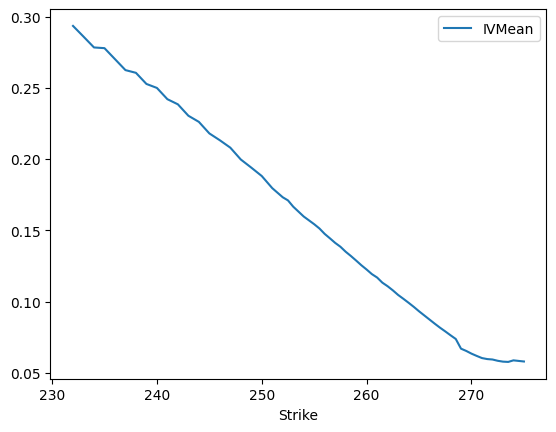

In [ ]:
df_pandas.plot(x="Strike", y="IVMean");

## Filtering Using a `.join()`

The **polars** package has a variety of joining functionality as well that can be accessed with the `DataFrame.join()` method.  Here we use an inner-join to perform the same filtering that we performed above.

In [ ]:
df_delta_neutral.join(df_universe, how="inner", left_on="UnderlyingSymbol", right_on="underlying")

UnderlyingSymbol,UnderlyingPrice,Type,Expiration,DataDate,Strike,Last,Bid,Ask,Volume,IVMean
str,f64,str,date,date,f64,f64,f64,f64,i64,f64
"""DIA""",248.02,"""call""",2018-01-05,2018-01-02,200.0,0.0,47.65,48.15,0,0.0841
"""DIA""",248.02,"""put""",2018-01-05,2018-01-02,200.0,0.01,0.0,0.02,0,0.1593
"""DIA""",248.02,"""call""",2018-01-05,2018-01-02,202.5,0.0,45.15,45.65,0,0.0841
"""DIA""",248.02,"""put""",2018-01-05,2018-01-02,202.5,0.0,0.0,0.06,0,0.1593
"""DIA""",248.02,"""call""",2018-01-05,2018-01-02,205.0,0.0,42.65,43.15,0,0.0841
…,…,…,…,…,…,…,…,…,…,…
"""XRT""",47.22,"""put""",2020-01-17,2018-01-31,52.0,0.0,7.8,8.45,0,0.2297
"""XRT""",47.22,"""call""",2020-01-17,2018-01-31,53.0,0.0,3.1,4.5,0,0.2089
"""XRT""",47.22,"""put""",2020-01-17,2018-01-31,53.0,0.0,8.35,9.1,0,0.2281


## `group_by` and Aggregations

In the context `group_by`, rows are grouped according to the unique values of the grouping expressions. You can then apply expressions to the resulting groups, which may be of variable lengths.

The following code calculates the unique `Expirations` and the `total_volume` for each `Underlying`.  In addition, a `List` column is created that lists all the unique `Expirations` for each `Underlying`.  This demonstrates a column type that doesn't exist in **pandas** - similar column data types are `Arrays` and `Structs`.

Also, notice the use of method chaining, which is very common in **polars** syntax.

In [ ]:
%%time
(
df_delta_neutral
    .group_by("UnderlyingSymbol")
    .agg(
        pl.col("Expiration").unique().count().alias("num_exp"),
        pl.col("Expiration").unique().alias("expirations"),
        pl.col("Volume").sum().cast(pl.Int32).alias("total_volume")
    )
).sort("total_volume", descending=True)

CPU times: user 2.44 s, sys: 1.89 s, total: 4.33 s
Wall time: 997 ms


UnderlyingSymbol,num_exp,expirations,total_volume
str,u32,list[date],i32
"""SPY""",38,"[2018-01-03, 2018-01-05, … 2020-12-18]",70556071
"""VIX""",14,"[2018-01-03, 2018-01-10, … 2018-07-18]",20688882
"""QQQ""",21,"[2018-01-05, 2018-01-12, … 2020-01-17]",18774095
"""SPXW""",43,"[2018-01-02, 2018-01-03, … 2018-12-31]",17576639
"""SPX""",13,"[2018-01-19, 2018-02-16, … 2020-12-18]",14087195
…,…,…,…
"""FALC""",1,[2018-02-16],0
"""EGI""",5,"[2018-01-19, 2018-02-16, … 2018-09-21]",0
"""USHY""",5,"[2018-01-19, 2018-02-16, … 2018-09-21]",0


## Caclulating Monthly Returns

Let's now calculate daily and monthly returns for our underlyings using the some of the techniques we have explored thus far.  We begin by reading in the `stock_quote` data.

In [ ]:
%%time
df_upx = pl.read_csv("data/L3_2018_01/L3_stockquotes_*.csv")
cols_to_drop = ["open", "high", "low", "volume", "adjustedclose"]
df_upx = df_upx.drop(cols_to_drop)

CPU times: user 81.7 ms, sys: 17.3 ms, total: 99 ms
Wall time: 34 ms


Next, lets convert the `quote_date` column to a `Date`.

In [ ]:
df_upx = df_upx.with_columns(
    quotedate = pl.col("quotedate").str.to_date(format="%m/%d/%Y"),
).sort(["symbol", "quotedate"])
df_upx

symbol,quotedate,close
str,date,f64
"""A""",2018-01-02,67.6
"""A""",2018-01-03,69.32
"""A""",2018-01-04,68.8
"""A""",2018-01-05,69.9
"""A""",2018-01-08,70.05
…,…,…
"""ZYNE""",2018-01-25,11.5
"""ZYNE""",2018-01-26,12.07
"""ZYNE""",2018-01-29,12.8


We can use the `.pct_change()` method with the `.over()` method to calculate returns for each of the `symbols`.

In [ ]:
df_upx = df_upx.with_columns(
    pl.col("close").pct_change().over("symbol").alias("return")
)
df_upx

symbol,quotedate,close,return
str,date,f64,f64
"""A""",2018-01-02,67.6,null
"""A""",2018-01-03,69.32,0.025444
"""A""",2018-01-04,68.8,-0.007501
"""A""",2018-01-05,69.9,0.015988
"""A""",2018-01-08,70.05,0.002146
…,…,…,…
"""ZYNE""",2018-01-25,11.5,-0.006908
"""ZYNE""",2018-01-26,12.07,0.049565
"""ZYNE""",2018-01-29,12.8,0.060481


Now, we use aggregation in the `group_by` context to calculate monthly returns.

In [ ]:
(
df_upx.group_by("symbol")
    .agg(
        monthy_return = (1 + pl.col("return")).product() - 1    
    )
)

symbol,monthy_return
str,f64
"""EFAV""",0.027694
"""IEO""",0.008178
"""IJK""",0.032184
"""PRAA""",0.071964
"""SPDW""",0.03975
…,…
"""EFZ""",-0.04076
"""QLD""",0.138922
"""EBSB""",-0.012077


## Exporting Data

Exporting a `DataFrame` is quite straight forward and **polars** supports many different file formats.  Below we demonstrate exporting to a parquet file.  The parquet file is superior to CSVs in many ways, especially for large data sets.  For example, notice how much smaller the parquet file is than the combination of all the CSVs.  Import parqueting files is also much faster.

In [ ]:
df_delta_neutral.write_parquet("delta_neutral.parquet")

## OLD CODE

In [ ]:
# df_upx.with_columns(
#     quotedate = pl.col("quotedate").str.to_date(format="%m/%d/%Y"),
# ).drop(
#     ["open", "high", "low", "volume", "adjustedclose"]
# ).sort(
#     ["symbol", "quotedate"]
# ).group_by("symbol").agg(pl.col("close").pct_change())

In [ ]:
#df.info()

In [ ]:
#df_delta_neutral.glimpse()
#df.memory_usage(deep=True).sum() 

In [ ]:
# import sys
# sys.getsizeof(df_delta_neutral)

In [ ]:
# %%time
# import polars as pl
# df_delta_neutral = pl.read_parquet("data/delta_neutral.parquet")